**Problem Statement -**
The objective of this project is to build and compare multiple machine learning algorithms
for the classification of round winners in the game CS:GO.

**Key Features of CS:GO**:
**Game Modes**:

**Competitive**: Standard 5v5 matches with two teams competing in 30 rounds, with the first team to win 16 rounds winning the match.

**Casual**: Less intense than Competitive, allowing players to enjoy the game without the pressure of ranked play.

**Deathmatch**: Players respawn instantly after death, aiming to get as many kills as possible within a set time limit.

**Arms Race**: Players advance through a series of weapons by getting kills, starting from weaker guns and progressing to stronger ones.

**Demolition**: A combination of bomb defusal and arms race modes, where players earn new weapons by getting kills and attempt to plant or defuse a bomb.

**Maps**: A variety of maps, each with its unique layout and strategic points. Popular maps include Dust II, Mirage, Inferno, and Nuke.

**Weapons and Equipment**: A wide range of firearms, grenades, and other equipment that players can buy at the start of each round using in-game currency earned from previous rounds.

**Skill Groups**: A ranking system that places players in different skill groups based on their performance in competitive matches.

**Esports: CS**
is a major title in the esports scene, with professional teams competing in tournaments worldwide for significant prize money.

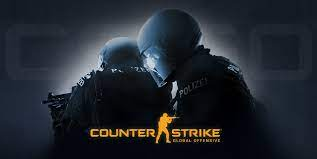

In [ ]:
import pandas as pd #Data manipulation
import numpy as np  #Numerical python
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization


**About this file**

The dataset consists of round snapshots from about 700 demos from high level tournament play in 2019 and 2020. Warmup rounds and restarts have been filtered, and for the remaining live rounds a round snapshot has been recorded every 20 seconds until the round is decided. Following its initial publication, It has been pre-processed and flattened to improve readability and make it easier for algorithms to process. The total number of snapshots is 122411. Snapshots are i.i.d and should be treated as individual data points, not as part of a match.

In [ ]:
df=pd.read_csv("csgo_round_snapshots.csv")

In [ ]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [ ]:
#almost balanced dataset
df['round_winner'].value_counts()

,count
round_winner,
T,62406
CT,60004


In [ ]:
df.shape

(122410, 97)

In [ ]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [ ]:
df.info()  #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [ ]:
df.describe() .round()  #basic stats

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.0,122410.0,122410.0,122410.0,122410.0,122410.0,122410.0,122410.0,122410.0,122410.0,...,122410.0,122410.0,122410.0,122410.0,122410.0,122410.0,122410.0,122410.0,122410.0,122410.0
mean,98.0,7.0,7.0,412.0,403.0,314.0,298.0,9789.0,11241.0,2.0,...,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
std,54.0,5.0,5.0,132.0,140.0,171.0,175.0,11215.0,12163.0,2.0,...,2.0,2.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,55.0,3.0,3.0,350.0,322.0,194.0,174.0,1300.0,1550.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,95.0,6.0,6.0,500.0,500.0,377.0,334.0,5500.0,7150.0,2.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,167.0,10.0,10.0,500.0,500.0,486.0,468.0,14600.0,18000.0,4.0,...,3.0,3.0,3.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0
max,175.0,32.0,33.0,500.0,600.0,500.0,500.0,80000.0,80000.0,5.0,...,7.0,7.0,6.0,9.0,5.0,3.0,3.0,5.0,3.0,2.0


In [ ]:
df.isnull().sum()

,0
time_left,0
ct_score,0
t_score,0
map,0
bomb_planted,0
...,...
ct_grenade_molotovgrenade,0
t_grenade_molotovgrenade,0
ct_grenade_decoygrenade,0
t_grenade_decoygrenade,0


In [ ]:
# There are no null values present in the dataset
df.isnull().sum().sum()

0

In [ ]:
df["map"].value_counts()

,count
map,
de_inferno,23811
de_dust2,22144
de_nuke,19025
de_mirage,18576
de_overpass,14081
de_train,13491
de_vertigo,11137
de_cache,145


In [ ]:
names=['HARSH','Intellipaat','success']
ages=[35,16,25]
comb=zip(names,ages)
list(comb)

[('HARSH', 35), ('Intellipaat', 16), ('success', 25)]

In [ ]:
counts = df['map'].value_counts()
total = counts.sum()
percentages = counts / total * 100

for map_name, count, percent in zip(counts.index, counts.values, percentages.values):
    print(f'{map_name}: {percent:.2f}%','/',count)

de_inferno: 19.45% / 23811
de_dust2: 18.09% / 22144
de_nuke: 15.54% / 19025
de_mirage: 15.18% / 18576
de_overpass: 11.50% / 14081
de_train: 11.02% / 13491
de_vertigo: 9.10% / 11137
de_cache: 0.12% / 145


In [ ]:
total

122410

In [ ]:
23811/122410

0.19451842169757372

In summary, the code is providing an overview of how rounds are distributed across different maps in the CS:GO dataset. It gives insights into the popularity or frequency of matches on each map, allowing for a better understanding of teams' success on specific map locations

Text(0, 0.5, 'Count')

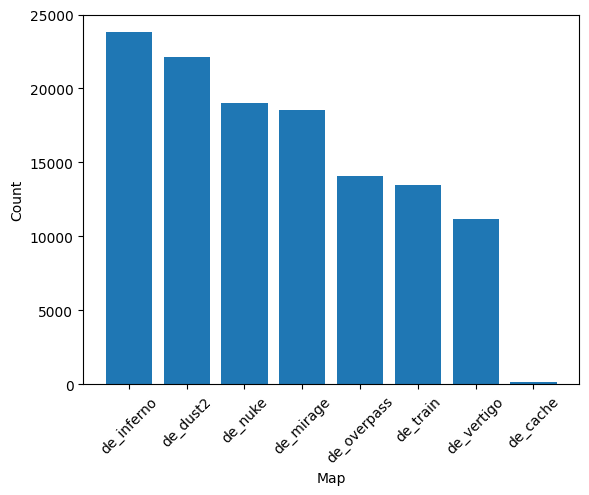

In [ ]:
plt.bar(counts.index, counts.values)

plt.xticks(rotation=45)
plt.xlabel('Map')

plt.ylabel('Count')

load the lib

load the data

EDA

feature eng.

feature selection

model building

model evaluation

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(
        x=counts.index,
        y=counts.values,
        text=counts.values,
        textposition='auto',
    )
])

fig.update_layout(
    xaxis_title='Map',
    yaxis_title='Count',
    xaxis=dict(
        tickangle=45  # Rotate x-axis labels
    )
)

fig.show()


In [ ]:
for i in df.columns:
  if (df[i].dtypes=="object") | (df[i].dtypes=="bool"):
    print("Columns which have categorical values",i)

Columns which have categorical values map
Columns which have categorical values bomb_planted
Columns which have categorical values round_winner


In [ ]:
df["bomb_planted"].value_counts()

,count
bomb_planted,
False,108726
True,13684


In [ ]:
df["map"].value_counts()

,count
map,
de_inferno,23811
de_dust2,22144
de_nuke,19025
de_mirage,18576
de_overpass,14081
de_train,13491
de_vertigo,11137
de_cache,145


In [ ]:
df["round_winner"].value_counts()

,count
round_winner,
T,62406
CT,60004


In [ ]:
# Converting categorical features into a integer column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["bomb_planted"]=le.fit_transform(df["bomb_planted"])
df["map"]=le.fit_transform(df["map"])
df["round_winner"]=le.fit_transform(df["round_winner"])

In [ ]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
X=df.drop(columns=["round_winner"])  #independent
y=df[["round_winner"]]  #dependent

In [ ]:
X.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(97928, 96)

In [ ]:
x_test.shape

(24482, 96)

In [ ]:
y_train.shape

(97928, 1)

In [ ]:
y_test.shape

(24482, 1)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# Applying Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda=LinearDiscriminantAnalysis()

In [ ]:
lda.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LinearDiscriminantAnalysis()

In [ ]:
lda.transform(x_test)

array([[-0.31066701],
       [ 0.16160545],
       [-2.19522227],
       ...,
       [ 2.91456775],
       [-1.65102466],
       [ 0.99528168]])

In [ ]:
# Obtaining the LDA coefficients.This will give the importance scores associated with each feature.

In [ ]:
lda_coefficients=np.exp(np.abs(lda.coef_))

In [ ]:
lda_coefficients

array([[1.14051375, 1.02348232, 1.02361012, 1.08711166, 1.26443741,
        1.56896428, 1.42226149, 1.71174795, 1.72149378, 1.22695841,
        1.17629264, 1.02925519, 1.17393359, 1.01233178, 1.17701202,
        1.26888831, 1.21975251, 1.80580698, 1.22872837, 1.03124048,
        1.37208174, 1.26351299, 1.        , 1.00130014, 1.00099319,
        1.03406233, 1.01079854, 1.01589366, 1.1511331 , 1.0481572 ,
        1.        , 1.01891369, 1.04559279, 1.13912974, 1.02386319,
        1.01009894, 1.        , 1.        , 1.10758456, 1.051198  ,
        1.62280372, 1.10928011, 1.01408145, 1.11733322, 1.02306813,
        1.00594113, 1.01383628, 1.04016588, 1.00546389, 1.00296978,
        1.1231047 , 1.0350133 , 1.        , 1.00757676, 1.02090408,
        1.00405543, 1.0252188 , 1.01962772, 1.        , 1.00493109,
        1.        , 1.01827676, 1.00401758, 1.01179667, 1.24546089,
        1.71649302, 1.08595734, 1.01928052, 1.05378886, 1.0817296 ,
        1.0223457 , 1.00392739, 1.00787732, 1.06

In [ ]:
lda_coefficients= lda_coefficients.flatten()

In [ ]:
#work of flatten
a=np.array([[1,2,3],[4,5,6]])
a_flat=a.flatten()
print(a_flat)

[1 2 3 4 5 6]


In [ ]:
lda_coefficients

array([1.14051375, 1.02348232, 1.02361012, 1.08711166, 1.26443741,
       1.56896428, 1.42226149, 1.71174795, 1.72149378, 1.22695841,
       1.17629264, 1.02925519, 1.17393359, 1.01233178, 1.17701202,
       1.26888831, 1.21975251, 1.80580698, 1.22872837, 1.03124048,
       1.37208174, 1.26351299, 1.        , 1.00130014, 1.00099319,
       1.03406233, 1.01079854, 1.01589366, 1.1511331 , 1.0481572 ,
       1.        , 1.01891369, 1.04559279, 1.13912974, 1.02386319,
       1.01009894, 1.        , 1.        , 1.10758456, 1.051198  ,
       1.62280372, 1.10928011, 1.01408145, 1.11733322, 1.02306813,
       1.00594113, 1.01383628, 1.04016588, 1.00546389, 1.00296978,
       1.1231047 , 1.0350133 , 1.        , 1.00757676, 1.02090408,
       1.00405543, 1.0252188 , 1.01962772, 1.        , 1.00493109,
       1.        , 1.01827676, 1.00401758, 1.01179667, 1.24546089,
       1.71649302, 1.08595734, 1.01928052, 1.05378886, 1.0817296 ,
       1.0223457 , 1.00392739, 1.00787732, 1.06560713, 1.02458

In [ ]:
X.shape

(122410, 96)

In [ ]:
num_features=X.shape[1]

In [ ]:
num_features

96

In [ ]:
feature_indices=np.arange(num_features)

In [ ]:
feature_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [ ]:
feature_names=list(X.columns)

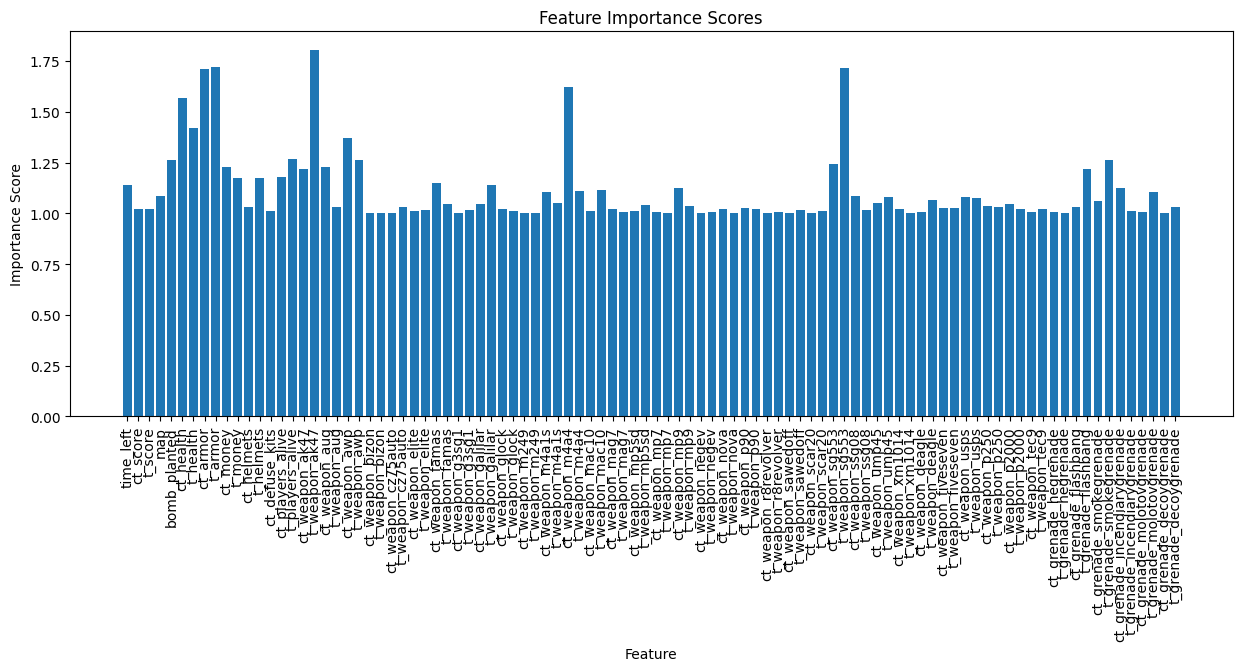

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(feature_indices,lda_coefficients)
plt.xticks(feature_indices,feature_names,rotation="vertical")
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()

In [ ]:
# Performing feature selection using LDA by using the absolute values of the
# LDA coefficients as a measure of feature importance.

In [ ]:
df_feature_score=pd.DataFrame({"Feature_names":feature_names,"feature_scores":lda_coefficients})

In [ ]:
top_20_values=df_feature_score.nlargest(20,'feature_scores')

In [ ]:
# Selecting the top 20 features based on the feature importance

In [ ]:
top_20_values.head(20)

,Feature_names,feature_scores
17,t_weapon_ak47,1.805807
8,t_armor,1.721494
65,t_weapon_sg553,1.716493
7,ct_armor,1.711748
40,ct_weapon_m4a4,1.622804
5,ct_health,1.568964
6,t_health,1.422261
20,ct_weapon_awp,1.372082
15,t_players_alive,1.268888
4,bomb_planted,1.264437


In [ ]:
top_20_values.index

Index([17, 8, 65, 7, 40, 5, 6, 20, 15, 4, 89, 21, 64, 18, 9, 16, 87, 14, 10,
       12],
      dtype='int64')

In [ ]:
x_train=x_train[:,[17, 8, 65, 7, 40, 5, 6, 20, 15, 4, 89, 21, 64, 18, 9, 16, 87, 14,
            10, 12]]

In [ ]:
x_test=x_test[:,[17, 8, 65, 7, 40, 5, 6, 20, 15, 4, 89, 21, 64, 18, 9, 16, 87, 14,
            10, 12]]

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7516951229474717

0.7516951229474717

In [ ]:
y_test.value_counts()

,count
round_winner,
1,12478
0,12004


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75     12004
           1       0.77      0.74      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8162323339596438

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     12004
           1       0.82      0.82      0.82     12478

    accuracy                           0.82     24482
   macro avg       0.82      0.82      0.82     24482
weighted avg       0.82      0.82      0.82     24482



In [ ]:
# Random Forest  #bagging
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
accuracy_score(y_test,y_pred)

0.8552405849195327

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     12004
           1       0.86      0.85      0.86     12478

    accuracy                           0.86     24482
   macro avg       0.86      0.86      0.86     24482
weighted avg       0.86      0.86      0.86     24482



In [ ]:
# Clearly we can see that random forest is the best model for this dataset.
# It has the highest accuracy and f1-score